<a href="https://colab.research.google.com/github/Salgadoalan/Proyecto-2/blob/main/carac_socio_eco_Guerreroipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('concentradohogar.csv')

import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import skew, kurtosis

#Mediante un análisis exploratorio obtendremos las características socio-demográficas de Guerrero.

In [ ]:
#Del Csv, definimos df_guerrero como los registros correspondientes a Guerrero con clave de entidad 12. Mostrando únicamente las observaciones de este estado.


df_guerrero = df[df['ubica_geo'].astype(str).str[:2] == '12']

num_observaciones, num_variables = df_guerrero.shape
print(f"El archivo contiene {num_observaciones} observaciones y {num_variables} variables.")
df_guerrero

El archivo contiene 2538 observaciones y 126 variables.


,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,...,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
33987,1200013501,1,12001,1,2,186,4091,515,2,2,...,0.0,0.0,0.0,0.0,0.0,3326.08,3366.19,0.00,3659.67,15558.3
33988,1200013503,1,12001,1,2,186,4091,515,2,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,73.36,0.00,15558.3
33989,1200013504,1,12001,1,2,186,4091,515,2,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
33990,1200013506,1,12001,1,2,186,4091,515,1,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
33991,1200046701,1,12001,1,2,186,4092,383,2,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36520,1261653920,1,12034,4,1,201,4318,304,2,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
36521,1261653921,1,12034,4,1,201,4318,304,3,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
36522,1261653922,1,12034,4,1,201,4318,304,1,2,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3
36523,1261653923,1,12034,4,1,201,4318,304,2,1,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15558.3



#Gráfica del nivel de estudios del jefe del hogar por cada entidad.


<ipython-input-16-701e9bdbf813>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guerrero['educa_jefe_desc'] = df_guerrero['educa_jefe'].map(educa_jefe_map)


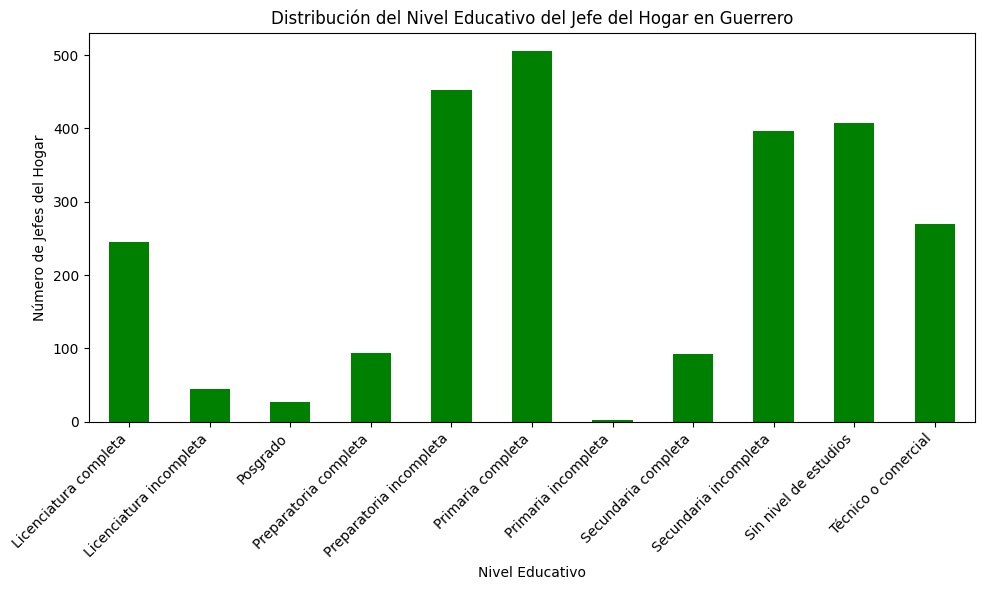

In [ ]:
#utilizaremos seaborn para visualizar la distribución del nivel educativo del jefe de hogar en cada entidad.



# se crea un diccionario que mapea los valores numéricos de educa_jef
educa_jefe_map = {
    1: 'Sin nivel de estudios',
    2: 'Primaria incompleta',
    3: 'Primaria completa',
    4: 'Secundaria incompleta',
    5: 'Secundaria completa',
    6: 'Preparatoria incompleta',
    7: 'Preparatoria completa',
    8: 'Técnico o comercial',
    9: 'Licenciatura incompleta',
    10: 'Licenciatura completa',
    11: 'Posgrado'
}

#la función map toma los valores de la columna educa_jefe y los reemplaza con las descripciones definidas en el diccionario
df_guerrero['educa_jefe_desc'] = df_guerrero['educa_jefe'].map(educa_jefe_map)


#value_counts()esta función cuenta cuántas veces aparece cada categoría en la columna
#sort_index() ordena los resultados por el índice
niveles_estudios_guerrero = df_guerrero['educa_jefe_desc'].value_counts().sort_index()

#creamos la tabla
plt.figure(figsize=(10, 6))
niveles_estudios_guerrero.plot(kind='bar', color='green')

#diseñamos la gráfica
plt.title('Distribución del Nivel Educativo del Jefe del Hogar en Guerrero')
plt.ylabel('Número de Jefes del Hogar')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')

# mostramos la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# agrupamos por estrato socioeconómico y calculamos el ingreso promedio
ingreso_promedio = df_guerrero.groupby('est_socio')['ing_cor'].mean().reset_index()

   est_socio       ing_cor
0          1  33691.226059
1          2  50493.551640
2          3  63580.616560
3          4  70307.608750


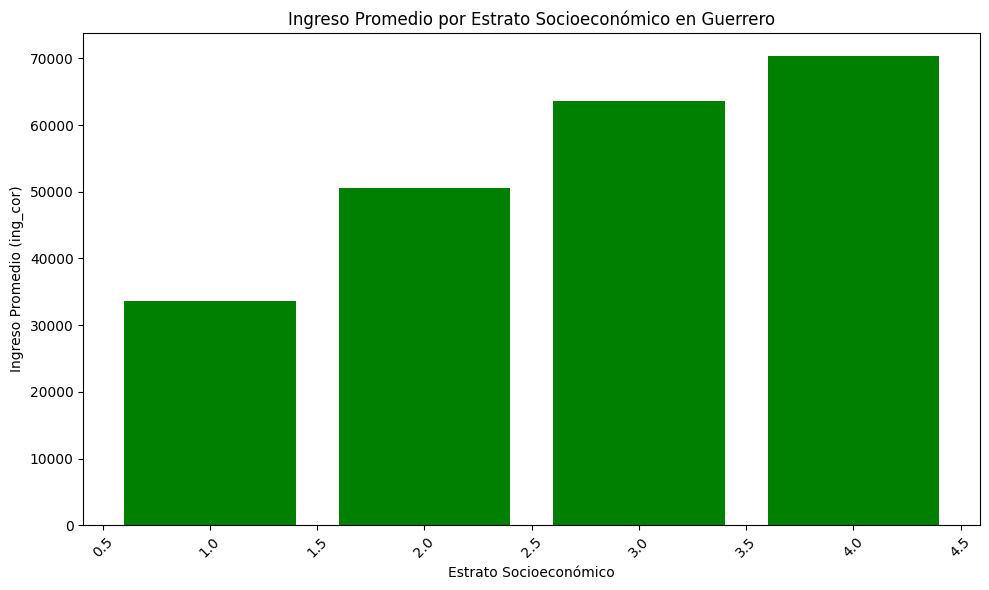

In [ ]:


# Mostrar la tabla con el ingreso promedio por estrato socioeconómico
print(ingreso_promedio)
# Diseñamos la grafica de barras
plt.figure(figsize=(10, 6))
plt.bar(ingreso_promedio['est_socio'], ingreso_promedio['ing_cor'], color='green')
plt.title('Ingreso Promedio por Estrato Socioeconómico en Guerrero')
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Ingreso Promedio ')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



#Histograma por entidad del gasto corriente monetario.


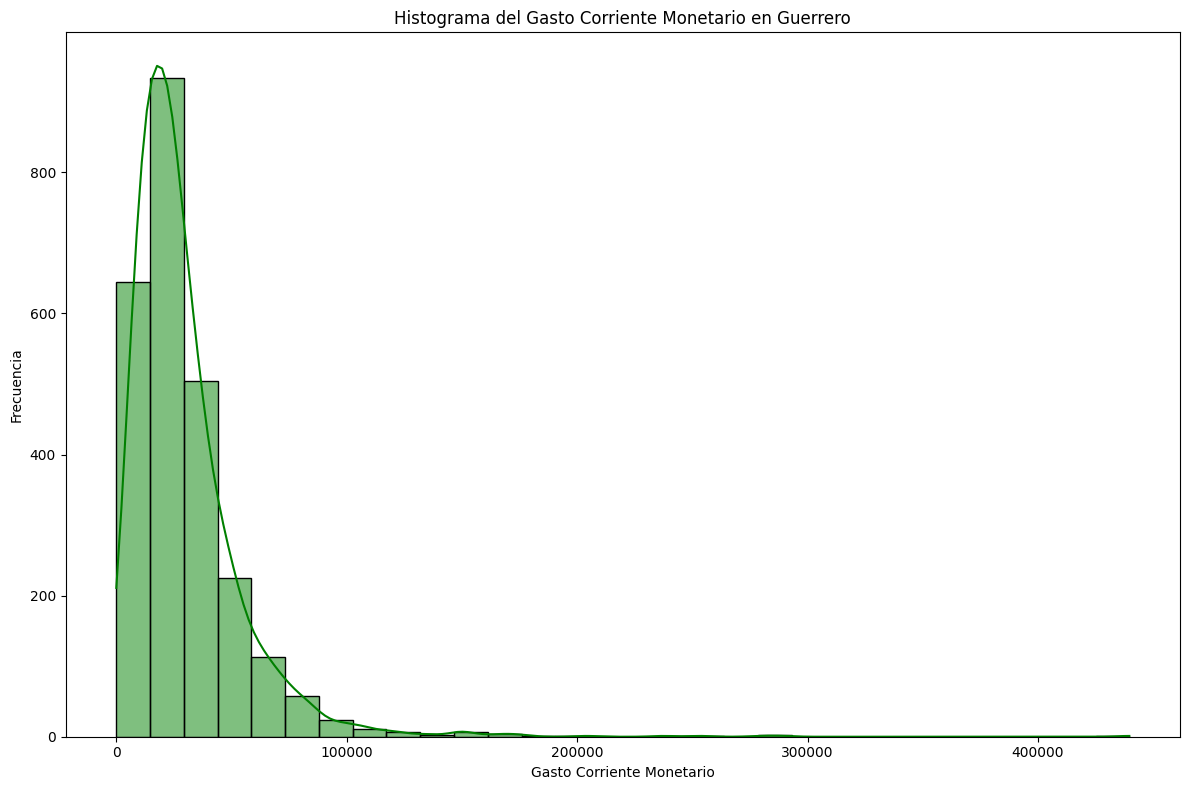

Asimetría del gasto corriente monetario en Guerrero: 4.342720534312195
Curtosis del gasto corriente monetario en Guerrero: 41.821073190056424
La distribución presenta asimetría positiva.
La distribución presenta leptocurtosis (picos afilados).


In [ ]:

#Con sns.histplot generamos un histograma del gasto corriente monetario
#Y con kde=True agregamos una curva de densidad sobre el histograma para visualizar la distribución de los datos.
plt.figure(figsize=(12, 8))
sns.histplot(data=df_guerrero, x='gasto_mon', bins=30, kde=True, color='green')

# diseñamos el gráfico
plt.title('Histograma del Gasto Corriente Monetario en Guerrero')
plt.xlabel('Gasto Corriente Monetario')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

#Para calcular la asimetría de la distribución del gasto usamos :skew
#kurtosis: Calcula la curtosis, que indica la forma de la distribución en términos de picos.
asimetria = skew(df_guerrero['gasto_mon'].dropna())
curtosis_valor = kurtosis(df_guerrero['gasto_mon'].dropna())

print(f"Asimetría del gasto corriente monetario en Guerrero: {asimetria}")
print(f"Curtosis del gasto corriente monetario en Guerrero: {curtosis_valor}")

# condiciones de la asimetría y curtosis
if asimetria > 0:
    print("La distribución presenta asimetría positiva.")
elif asimetria < 0:
    print("La distribución presenta asimetría negativa.")
else:
    print("La distribución es simétrica.")

if curtosis_valor > 3:
    print("La distribución presenta leptocurtosis (picos afilados).")
elif curtosis_valor < 3:
    print("La distribución presenta platicurtosis (picos más suaves).")
else:
    print("La distribución es mesocúrtica (similar a una normal).")




#Histograma del ingreso corriente del hogar por entidad según la escolaridad del jefe del hogar, también su densidad estimada.



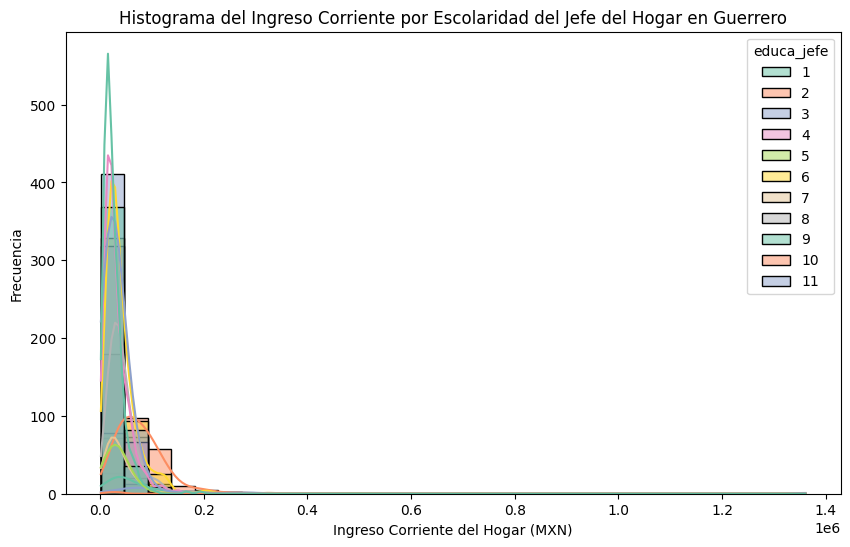

In [ ]:
# creamos un histograma
plt.figure(figsize=(10, 6))

#hacemos el histograma con una línea de densidad estimada para visualizar la distribución suave de los datos
#la línea de densidad estimada proporciona una visión más clara de la distribución de los ingresos puede ayudar a visualizar mejor las áreas donde hay más frecuencia de ingresos,
#suavizando las variaciones que pueden ser más notorias en el histograma.

sns.histplot(data=df_guerrero, x='ing_cor', hue='educa_jefe', kde= True, bins=30, palette= 'Set2')

# agregamos las etiquetas
plt.title('Histograma del Ingreso Corriente por Escolaridad del Jefe del Hogar en Guerrero')
plt.xlabel('Ingreso Corriente del Hogar (MXN)')
plt.ylabel('Frecuencia')

#gráfica
plt.show()



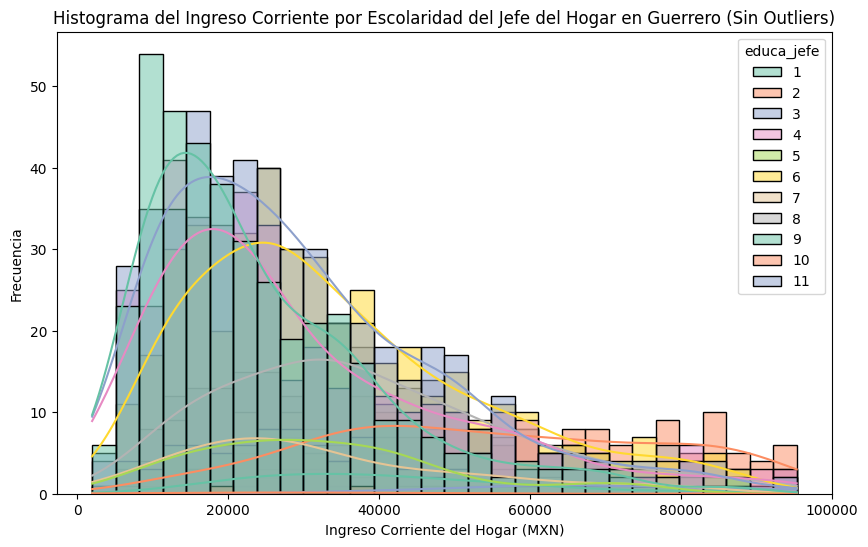

In [ ]:


# Gráfica sin outliers

#Calculamos el primer cuartil (Q1) y el tercer cuartil (Q3) del ingreso corriente, y luego se eliminan los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
Q1 = df_guerrero['ing_cor'].quantile(0.25)
Q3 = df_guerrero['ing_cor'].quantile(0.75)
IQR = Q3 - Q1

# filtra los outliers fuera de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
df_guerrero_sin_outliers = df_guerrero[(df_guerrero['ing_cor'] >= Q1 - 1.5 * IQR) & (df_guerrero['ing_cor'] <= Q3 + 1.5 * IQR)]

# Creamos el histograma
plt.figure(figsize=(10, 6))

# histograma densidad estimada sin outliers
sns.histplot(data=df_guerrero_sin_outliers, x='ing_cor', hue='educa_jefe', kde=True, bins=30, palette = 'Set2')

#  etiquetas
plt.title('Histograma del Ingreso Corriente por Escolaridad del Jefe del Hogar en Guerrero (Sin Outliers)')
plt.xlabel('Ingreso Corriente del Hogar (MXN)')
plt.ylabel('Frecuencia')

# mostramos la gráfica
plt.show()

In [ ]:
# calcula la desviación estándar del ingreso corriente por cada escolaridad
desviacion_por_categoria = df_guerrero.groupby('educa_jefe')['ing_cor'].std()

# imprimos el resultado
print(f'La desviación estándar del ingreso corriente por cada categoría escolaridad es:{desviacion_por_categoria}')




La desviación estándar del ingreso corriente por cada categoría escolaridad es:educa_jefe
1     19965.443884
2     14300.782101
3     65088.748895
4     23814.505597
5     51268.642596
6     30337.702717
7     37051.626949
8     29316.843883
9     53598.780932
10    65490.317403
11    75184.047138
Name: ing_cor, dtype: float64


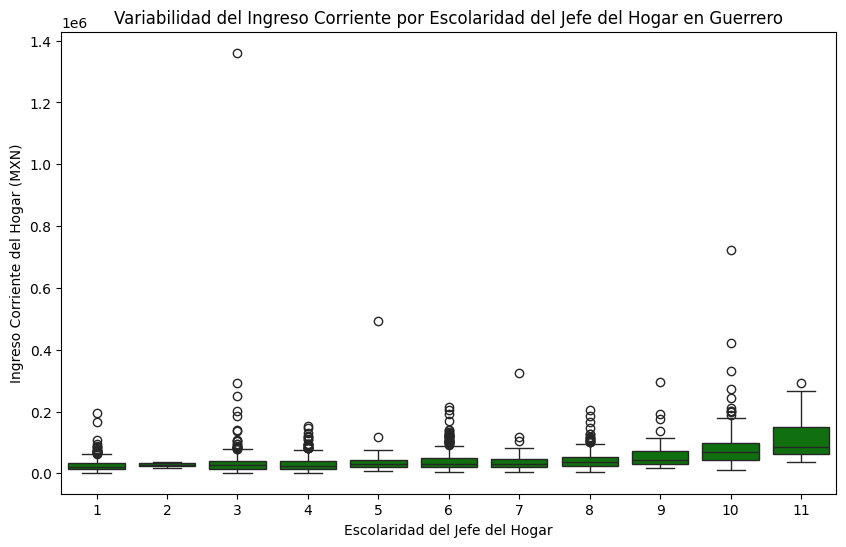

In [ ]:

#este boxplot nos permitirá visualizar el rango intercuartílico y los posibles outliers
#para cada categoría de escolaridad, lo que facilita identificar la categoría con mayor dispersión.
plt.figure(figsize=(10, 6))
sns.boxplot(x='educa_jefe', y='ing_cor', data=df_guerrero, color = 'green')
plt.title('Variabilidad del Ingreso Corriente por Escolaridad del Jefe del Hogar en Guerrero')
plt.xlabel('Escolaridad del Jefe del Hogar')
plt.ylabel('Ingreso Corriente del Hogar (MXN)')
plt.show()



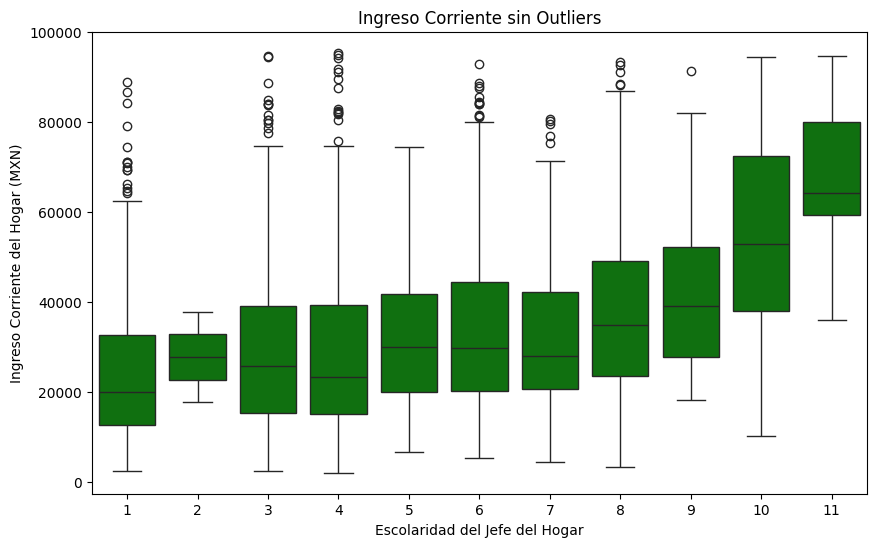

In [ ]:
# a veces es útil realizar el análisis tanto con como sin los outliers para entender su impacto.
# definimos los límites para identificar outliers
Q1 = df_guerrero['ing_cor'].quantile(0.25)
Q3 = df_guerrero['ing_cor'].quantile(0.75)
IQR = Q3 - Q1

# definimos en df_puebla los outliers
df_sin_outliers = df_guerrero[(df_guerrero['ing_cor'] >= (Q1 - 1.5 * IQR)) & (df_guerrero['ing_cor'] <= (Q3 + 1.5 * IQR))]

# graficamos sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='educa_jefe', y='ing_cor', data=df_sin_outliers, color = 'green')
plt.title('Ingreso Corriente sin Outliers')
plt.xlabel('Escolaridad del Jefe del Hogar')
plt.ylabel('Ingreso Corriente del Hogar (MXN)')
plt.show()

#**Conclusiones**
La categoría con mayor desviación estándar en Guerrero es preparatoria incompleta (educa_jefe = 7), con 80,413.22 MXN. Indica que, aunque algunos hogares en esta categoría pueden tener ingresos significativamente altos, también hay otros con ingresos mucho más bajos, lo que indica una gran variabilidad dentro de esta categoría.

Las categorías con menor desviación estándar son sin estudios (educa_jefe = 1) y primaria incompleta (educa_jefe = 3), con desviaciones estándar de 19,566.62 MXN y 26,091.05 MXN, respectivamente.

Aunque los hogares con un jefe de hogar más educado tienden a tener ingresos más altos, la alta variabilidad observada en estas categorías sugiere que no todos los individuos con un mayor nivel educativo logran un ingreso elevado.

